In [2]:
import torch
import numpy as np

In [3]:
a = torch.tensor([[1,2]])
b = torch.tensor(1)
print(a)
print(b)

tensor([[1, 2]])
tensor(1)


In [10]:
print(a+b)
print(a-b)
print(a*b)
print(a/b)

tensor(3)
tensor(1)
tensor(2)
tensor(2.)


In [11]:
a = torch.zeros((3,3))
print(a)
print(a.shape)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([3, 3])


In [26]:
torch.manual_seed(10)
a = torch.randn(3,3)
b = torch.randn(3,3)
print(a)
print(b)

tensor([[-0.6014, -1.0122, -0.3023],
        [-1.2277,  0.9198, -0.3485],
        [-0.8692, -0.9582, -1.1920]])
tensor([[ 1.9050, -0.9373, -0.8465],
        [ 2.2678,  1.3615,  0.0157],
        [ 1.0990,  0.9537,  1.4011]])


In [29]:
print(torch.add(a,b))

tensor([[ 1.3036, -1.9495, -1.1487],
        [ 1.0401,  2.2813, -0.3328],
        [ 0.2298, -0.0045,  0.2090]])


In [30]:
print(torch.sub(a,b))

tensor([[-2.5064, -0.0749,  0.5442],
        [-3.4955, -0.4417, -0.3641],
        [-1.9682, -1.9119, -2.5931]])


In [31]:
print(torch.mul(a,b))

tensor([[-1.1457,  0.9488,  0.2559],
        [-2.7842,  1.2523, -0.0055],
        [-0.9552, -0.9138, -1.6701]])


In [32]:
print(torch.div(a,b))

tensor([[ -0.3157,   1.0799,   0.3571],
        [ -0.5413,   0.6756, -22.2468],
        [ -0.7909,  -1.0047,  -0.8508]])


In [33]:
print(a)
print(torch.t(a))

tensor([[-0.6014, -1.0122, -0.3023],
        [-1.2277,  0.9198, -0.3485],
        [-0.8692, -0.9582, -1.1920]])
tensor([[-0.6014, -1.2277, -0.8692],
        [-1.0122,  0.9198, -0.9582],
        [-0.3023, -0.3485, -1.1920]])


In [37]:
c = torch.cat((a,b)) ## by default vertically or row wise
print(c)

tensor([[-0.6014, -1.0122, -0.3023],
        [-1.2277,  0.9198, -0.3485],
        [-0.8692, -0.9582, -1.1920],
        [ 1.9050, -0.9373, -0.8465],
        [ 2.2678,  1.3615,  0.0157],
        [ 1.0990,  0.9537,  1.4011]])


In [38]:
d = torch.cat((a,b), dim=1)
print(d)

tensor([[-0.6014, -1.0122, -0.3023,  1.9050, -0.9373, -0.8465],
        [-1.2277,  0.9198, -0.3485,  2.2678,  1.3615,  0.0157],
        [-0.8692, -0.9582, -1.1920,  1.0990,  0.9537,  1.4011]])


In [40]:
print(a)
a1 = a.reshape(1,9)
print(a1)
print(a1.shape)

tensor([[-0.6014, -1.0122, -0.3023],
        [-1.2277,  0.9198, -0.3485],
        [-0.8692, -0.9582, -1.1920]])
tensor([[-0.6014, -1.0122, -0.3023, -1.2277,  0.9198, -0.3485, -0.8692, -0.9582,
         -1.1920]])
torch.Size([1, 9])


In [43]:
arr = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]], dtype='float32')
print(arr)
t = torch.from_numpy(arr)
print(t)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


### Autograd

In [ ]:
# PyTorch uses a technique called automatic differentiation. It records all the operations that we are performing 
# and replays it backward to compute gradients. This technique helps us to save time on each epoch as we are 
# calculating the gradients on the forward pass itself.

In [50]:
a = torch.ones((2,2), requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [51]:
b = a + 5
c = b.mean()
print(a,c)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True) tensor(6., grad_fn=<MeanBackward0>)


In [52]:
c.backward()
print(a.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


### Optim Module

In [ ]:
from torch import optim

In [ ]:
# adam
## adam = optim.Adam(model.parameters(), lr=learning_rate)

# sgd
## SGD = optim.SGD(model.parameters(), lr=learning_rate)

### nn Module

In [ ]:
# In those cases, we can make use of the nn module. This defines a set of functions, similar to the layers 
# of a neural network, which takes the input from the previous state and produces an output.

In [58]:
x = torch.Tensor([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

In [59]:
y = torch.Tensor([[1],[1],[0]]) #actual output

In [60]:
print(x, '\n')
print(y)

tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]]) 

tensor([[1.],
        [1.],
        [0.]])


In [61]:
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + torch.exp(-x))

#Derivative of Sigmoid Function/
def derivatives_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [68]:
epoch=7000
lr=0.1 
input_tensor = x.shape[1]
hidden_layers = 3
output_tensor = 1
wh = torch.randn(input_tensor, hidden_layers).type(torch.FloatTensor)
bh = torch.randn(1, hidden_layers).type(torch.FloatTensor)
wh1 = torch.randn(hidden_layers, output_tensor)
bh1 = torch.randn(1, output_tensor)

In [74]:
for i in range(epoch):
    #Forward Propogation
    hidden_layer_input1 = torch.mm(x, wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hidden_layer_activations = sigmoid(hidden_layer_input)

    output_layer_input1 = torch.mm(hidden_layer_activations, wh1)
    output_layer_input = output_layer_input1 + bh1
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = torch.mm(d_output, wh1.t())
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wh1 += torch.mm(hidden_layer_activations.t(), d_output) *lr
    bh1 += d_output.sum() *lr
    wh += torch.mm(x.t(), d_hiddenlayer) *lr
    bh += d_output.sum() *lr

### Image Classification 

In [6]:
import torch
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [7]:
#RandomCrop, CenterCrop, 
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                              transforms.Resize(32),
                              transforms.RandomVerticalFlip(0.5),
                              transforms.RandomHorizontalFlip(0.5),
                              transforms.RandomRotation(0.5),
                              transforms.CenterCrop(32),
                              transforms.RandomCrop(32)])                             

In [8]:
trainset = datasets.CIFAR10('cifar10', download=False, train=True, transform = transform)
testset = datasets.CIFAR10('cifar10', download=True, train=True, transform = transform)

Files already downloaded and verified


In [62]:
print(len(testset))

50000


In [9]:
valid_size = 0.3
train_num = len(trainset)
indices = [i for i in range(train_num)]
split = int(valid_size * train_num)
train_idx, valid_idx = indices[split:], indices[:split]

In [10]:
trainsampler = SubsetRandomSampler(train_idx)
validsampler = SubsetRandomSampler(valid_idx)

In [11]:
# using more num_workers will increase the memory usage.
# Num_workers tells the data loader instance how many sub-processes to use for data loading. If the num_worker is #
# zero (default) the GPU has to weight for CPU to load data. Theoretically, greater the num_workers, more efficiently 
# the CPU load data and less the GPU has to wait.
trainloader = DataLoader(trainset, batch_size=32, sampler=trainsampler)
validloader = DataLoader(trainset, batch_size=32, sampler=validsampler)
testloader = DataLoader(testset, batch_size=32)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
print(images.shape) #[3, 28, 28]

torch.Size([32, 3, 32, 32])


In [14]:
def imshow(x):
    x = x/2+0.5
    plt.imshow(np.transpose(x,(1,2,0)))

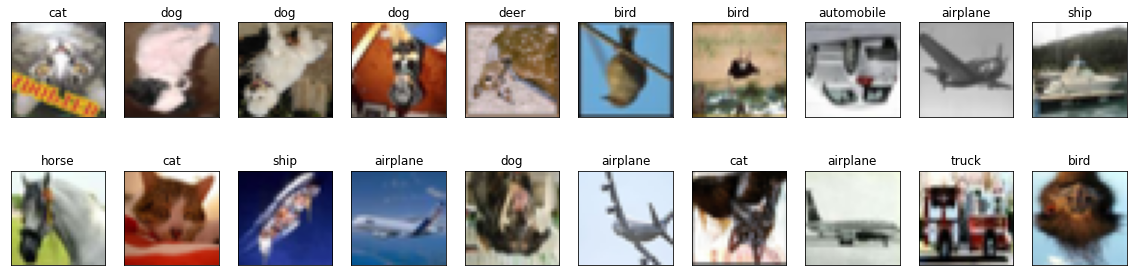

In [140]:
fig = plt.figure(figsize=(20,5))
for i in range(20):
    img = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    imshow(images[i].numpy())
    img.set_title(classes[labels[i]])

In [15]:
device = torch.cuda.is_available()
if device:
    print("GPU is available")
else:
    print("GPU not availble")

GPU not availble


In [16]:
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, 
#                padding_mode='zeros', device=None, dtype=None)

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        
        self.pool1 = nn.MaxPool2d(2,2)
        self.pool2 = nn.MaxPool2d(4,4)
        
        self.hidden1 = nn.Linear(4*4*64,128)
        self.hidden2 = nn.Linear(128,256)
        self.output = nn.Linear(256,10)
        
        self.dropout = nn.Dropout(0.3)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = F.relu(self.conv3(x))
        x = self.pool1(x)
        x = x.view(-1, 4*4*64)
        
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        x = self.output(x)
        
        return x

## Loss Functions

In [ ]:
#Regression Loss Functions
#1.Mean Squared Error Loss -> the average of the squared differences between the predicted and actual values.
#2.Mean Squared Logarithmic Error Loss -> first calculate the natural logarithm of each of the predicted values, 
# then calculate the mean squared error.
#3.Mean Absolute Error Loss -> the average of the absolute difference between the actual and predicted values.
#Binary Classification Loss Functions
#1.Binary Cross-Entropy -> the average difference between the actual and predicted probability distributions for 
# predicting class 1. (0,1)
#2.Hinge Loss -> SVM (-1,1) 
#Multi-Class Classification Loss Functions
#1.Multi-Class Cross-Entropy Loss 
#2.Sparse Multiclass Cross-Entropy Loss
#3.Kullback Leibler Divergence Loss

In [26]:
criterion = nn.CrossEntropyLoss()

## Optimizers

In [ ]:
# Gradient Descent -> takes derivative of the loss function and learning rate to minimise loss and achive minima.
# The weights are updated when the whole dataset gradient is calculated, which slows down the process
# Stochastic GD -> This is a changed version of the GD method, where the model parameters are updated on every 
# iteration. 
# Mini-Batch Gradient Descent -> Another variant of this GD approach is mini-batch, where the model parameters are 
# updated in small batch sizes. It means that after every n batches, the model parameters will be updated.
# AdaGrad -> Updating lr based on previous weight updates.
# RMSProp -> reduce aggressiveness of lr by taking exponential average of gradients.
# Adam -> RMSProp + momentum based GD.

In [27]:
optimizer = optim.SGD(model.parameters(), lr=0.01) #Calculating of gradients and optimising the weights
#optimizer = optim.Adam(model.parameters(), lr=0.03)

In [ ]:
# 1.Load the images from trainloader
# 2.set the gradients to zero -> optimizer.zero_grad()
# 3.get the output
# 4 calculate the loss
# 5.Calculate the deravative of loss function wrt to each parameter.Gradient is stored for every parameter x.grad() 
# 6.Update the parameters -> optimzer.step()
# x -= lr * x.grad()

In [40]:
epochs = 10
valid_loss_min = np.Inf

for i in range(1, epochs+1):
    print("Epochs : ", i)
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        # loss.item -> gives value instead of tensor
        train_loss += loss.item() * images.size(0) #batch_size
    model.eval()
    for images, labels in validloader:
        output = model(images)
        loss = criterion(output, labels)
        valid_loss += loss.item() * images.size(0) #batch_size
    train_loss = train_loss/len(trainloader)
    valid_loss = valid_loss/len(validloader)
    print("Train loss: ", train_loss)
    print("Valid loss: ", valid_loss)

Epochs :  1
Train loss:  73.69761653356186
Valid loss:  73.68350104228266
Epochs :  2
Train loss:  73.69491935430105
Valid loss:  73.68250322646932
Epochs :  3
Train loss:  73.69652231345447
Valid loss:  73.6828796614462
Epochs :  4
Train loss:  73.69606132088893
Valid loss:  73.68308367047992
Epochs :  5


KeyboardInterrupt: 

In [64]:
test_loss =0.0
total_accuracy = 0
classes_correct = [0 for i in range(10)]
classes_total = classes_correct
model.eval()
for images, labels in testloader: #each time 32 images are loaded, testloader-> steps
    output = model(images)
    loss = criterion(output, labels)
    test_loss += loss.item() * images.size(0) #batch_size
    _, pred = torch.max(output,1) # returns max_value, index of max_value
    # labels.data -> actual labels
    #print(pred)
    #print(labels)
    num_correct = 0
    accuracy = 0
    for i in range(len(pred)):
        if pred[i] == labels[i]:
            num_correct += 1
    #print(num_correct)
    accuracy = (num_correct/images.size(0))*100
    total_accuracy += accuracy
test_loss = test_loss/len(testloader)
total_accuracy = total_accuracy/len(testloader)
print("Test loss: ", test_loss)
print("Test accuracy ", total_accuracy)

Test loss:  73.68945477974393
Test accuracy  10.002799104286629
